In [1]:
# use full window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
os.chdir('..')
import virl
from matplotlib import pyplot as plt
import pickle

%cd
os.mkdir('Tabular_Policy_Output')
%cd Tabular_Policy_Output
%pwd

C:\Users\chozo
C:\Users\chozo\Tabular_Policy_Output


'C:\\Users\\chozo\\Tabular_Policy_Output'

In [2]:
from Tabular_Policy_Agent import Tabular_Policy_Agent

In [3]:
from plot_helper import plot

C:\Users\chozo\Tabular_Policy_Output
C:\Users\chozo\Tabular_Policy_Output
---
Problem id: 0

Decrease Factor: 0.0016
---
Problem id: 1

Decrease Factor: 0.0016
---
Problem id: 2

Decrease Factor: 0.0016
---
Problem id: 3

Decrease Factor: 0.0016
---
Problem id: 4

Decrease Factor: 0.0016


KeyboardInterrupt: 

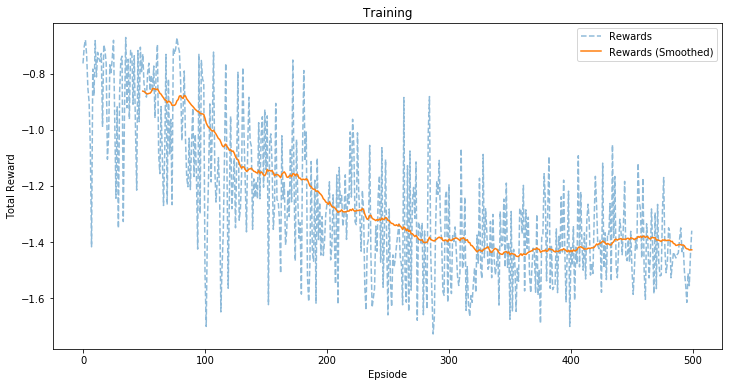

In [4]:
#train on the the problem id
%cd
%cd Tabular_Policy_Output
%pwd

for i in range(0,10):
    print("---")
    print("Problem id: " + str(i))
    print()
    
    env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
    agent = Tabular_Policy_Agent(env)
    states,all_rewards, all_total_rewards = agent.train()
    
    #write to binary
    with open('TabularPolicyP' + str(i) + '.pkl', 'wb') as output:
        pickle.dump(agent, output, pickle.HIGHEST_PROTOCOL)
    

    


In [ ]:
#train on stochastic and noisy to improve performance
%cd
%cd Tabular_Policy_Output
%pwd

stochastic_noisy = {0:virl.Epidemic(stochastic=False, noisy=False),1:virl.Epidemic(stochastic=True, noisy=False),2:virl.Epidemic(stochastic=False, noisy=True),3:virl.Epidemic(stochastic=True, noisy=True)}
stochastic_noisy_print = {0:"stochastic=False, noisy=False",1:"stochastic=True, noisy=False",2:"stochastic=False, noisy=True",3:"stochastic=True, noisy=True"}
for i in range(0,4):
    print(stochastic_noisy_print[i])
    
    env = stochastic_noisy[i] 
    agent = Tabular_Policy_Agent(env)
    states,all_rewards, all_total_rewards = agent.train()
    
    #write to binary
    with open('TabularPolicyS' + str(i) + '.pkl', 'wb') as output:
        pickle.dump(agent, output, pickle.HIGHEST_PROTOCOL)
    


In [ ]:
total_reward_sd = np.std(all_total_rewards)
total_reward_mean = np.mean(all_total_rewards)
reward_sd = np.std(all_rewards)
reward_mean = np.mean(all_rewards)

print("Total reward standard deviation = " + str(total_reward_sd))
print("Total reward mean = " + str(total_reward_mean))
print("Reward standard deviation = " + str(reward_sd))
print("Reward mean = " + str(reward_mean))